<a href="https://colab.research.google.com/github/eaglementality/Bank-GUI/blob/main/computerVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! git clone https://github.com/karaagro/giz-ai4agriculture

Cloning into 'giz-ai4agriculture'...
remote: Enumerating objects: 12096, done.
remote: Counting objects: 100% (2966/2966), done.
remote: Compressing objects: 100% (2947/2947), done.
remote: Total 12096 (delta 19), reused 2963 (delta 16), pack-reused 9130
Receiving objects: 100% (12096/12096), 241.91 MiB | 32.55 MiB/s, done.
Resolving deltas: 100% (22/22), done.
Checking out files: 100% (12013/12013), done.


In [ ]:
# importing libraries
import numpy as np
from skimage import io
import os
import pickle

In [ ]:
os.chdir('/content/giz-ai4agriculture/dates_yield_estimation_project/Dates Data')

! ls

 Immature   Kalal   Tamar  'Test Data'


In [ ]:
folders = ['Immature', 'Kalal', 'Tamar']

In [ ]:
folder_labels = {'Immature':0, 'Kalal':1, 'Tamar':2}

In [ ]:
image_files = []
labels = []

for folder in folders:
	os.chdir(folder)
	files = os.listdir()
	
	for file in files:
		img = io.imread(file)
		image_files.append(img)
		labels.append(folder_labels[folder])
		
	os.chdir('../')

In [ ]:
print(labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
image = image_files[0]

[[[115 112  77]
  [101  98  65]
  [119 113  89]
  ...
  [ 51  46  16]
  [ 50  46   9]
  [ 51  47   9]]

 [[159 156 121]
  [105 102  69]
  [113 107  83]
  ...
  [ 55  50  21]
  [ 55  50  18]
  [ 56  52  17]]

 [[200 197 166]
  [102  99  66]
  [103  99  74]
  ...
  [ 58  52  30]
  [ 61  55  29]
  [ 64  59  29]]

 ...

 [[255 255 253]
  [255 255 253]
  [255 255 253]
  ...
  [115  73  51]
  [121  75  52]
  [116  68  46]]

 [[255 255 253]
  [255 255 253]
  [255 255 253]
  ...
  [115  73  51]
  [122  76  53]
  [116  68  46]]

 [[255 255 253]
  [255 255 253]
  [255 255 253]
  ...
  [117  72  51]
  [122  76  53]
  [118  67  46]]]


In [ ]:
import pickle
from sklearn.model_selection import train_test_split

# keras imports for the dataset and building our neural network
from keras import *
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D,GlobalAveragePooling2D, Flatten
from keras.utils import np_utils
import tensorflow as tf
from tensorflow.keras.applications.mobilenet import MobileNet



from sklearn.metrics import accuracy_score


In [ ]:
image_files = np.array(image_files)
labels = np.array(labels)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(image_files, labels, test_size=0.33, random_state=42)


In [ ]:
base_model=MobileNet(weights='imagenet',include_top=False)

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x)
x=Dense(1024,activation='relu')(x)
x=Dense(512,activation='relu')(x)
preds=Dense(3,activation='softmax')(x)

17235968/17225924 [==============================] - 0s 0us/step


In [ ]:
model= Model(inputs=base_model.input,outputs=preds)

In [ ]:
# freeze every layer
for layer in model.layers:
    layer.trainable=False
# convolutional layer part
for layer in model.layers[:87]: 
    layer.trainable=False
 # classifier layer part
for layer in model.layers[87:]:
    layer.trainable=True

In [ ]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
60/60 [==============================] - 92s 2s/step - loss: 0.6818 - accuracy: 0.7144 - val_loss: 0.5680 - val_accuracy: 0.7768
Epoch 2/5
60/60 [==============================] - 92s 2s/step - loss: 0.4799 - accuracy: 0.8223 - val_loss: 0.5171 - val_accuracy: 0.7885
Epoch 3/5
60/60 [==============================] - 92s 2s/step - loss: 0.3621 - accuracy: 0.8674 - val_loss: 0.5193 - val_accuracy: 0.7906
Epoch 4/5
60/60 [==============================] - 92s 2s/step - loss: 0.3350 - accuracy: 0.8763 - val_loss: 0.5281 - val_accuracy: 0.8140
Epoch 5/5
60/60 [==============================] - 92s 2s/step - loss: 0.3262 - accuracy: 0.8658 - val_loss: 0.4246 - val_accuracy: 0.8342


30/30 - 39s - loss: 0.4246 - accuracy: 0.8342 - 39s/epoch - 1s/step


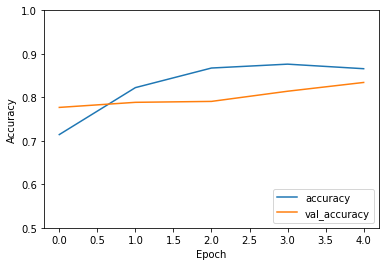

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

In [ ]:
model.save('dates_model.h5')